# Assignment #2: Data Analysis of Two Datasets

## Student Details:
- **Name:** Nauman Ali Murad
- **Registration:** 2022479
- **Course:** DS211 - Theory of Data Science
- **Instructor:** Abinta Mehmood Mir

## Objectives:
- Perform exploratory data analysis (EDA) on the provided dataset.
- Apply statistical analysis methods to uncover insights and trends within the data.
- Visualize key findings using appropriate charts and graphs.
- Interpret results and draw meaningful conclusions.
- Present findings in a clear and concise manner.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DS211/Pakistani_Traffic_Accidents.csv')

df1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DS211/Petrol_Gas_Prices_Worldwide.csv', encoding='latin1')

# because I had to run both the datasets in one file i made two dataframes.


## **Question 1 - Pakistan Traffic Accidents Dataset**

---



**1. In which province the most accidents have occurred?**

Provinces and Total number of accidents:  Province
Balochistan            4062
Khyber Pakhtunkhwa    37237
Punjab                49354
Sindh                 11607
Name: Total number of accidents, dtype: int64


The province with the most accidents is Punjab with -> 49354 accidents.


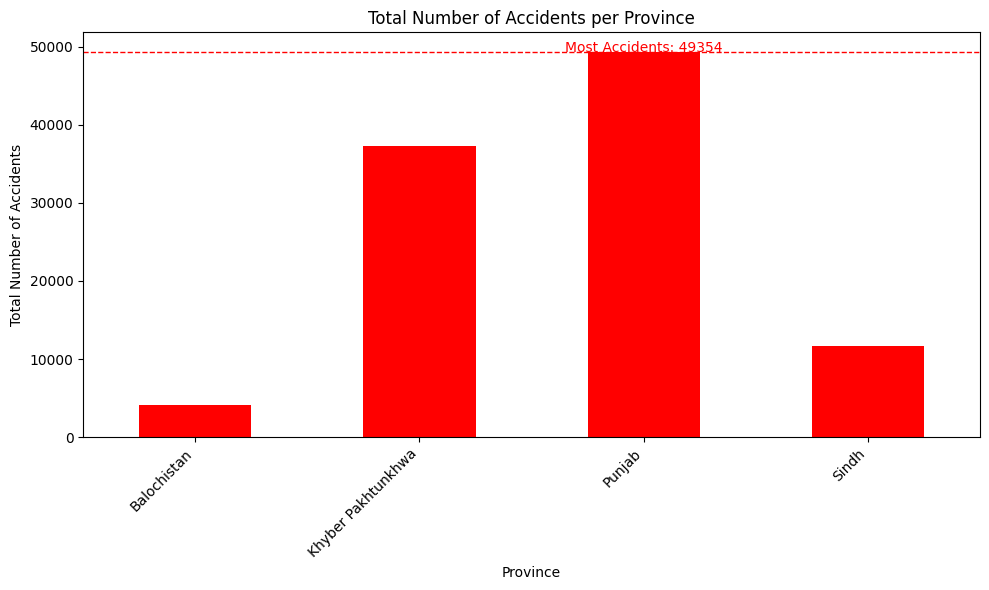

In [7]:
filtered_data = df[(df['Province'] != 'Pakistan') & (df['Province'] != 'Islamabad')]


# I had to add the province column otherwise it was difficult to analyize any data
# since pakistan and islamabad are in the proince coulum so i excluded it.

province_accidents = filtered_data.groupby('Province')['Total number of accidents'].sum()
print("Provinces and Total number of accidents: ", province_accidents)
print("\n")

province_with_max_accidents = province_accidents.idxmax()
print(f"The province with the most accidents is {province_with_max_accidents} with -> {province_accidents.max()} accidents.")

plt.figure(figsize=(10, 6))
province_accidents.plot(kind='bar', color='red')
plt.title('Total Number of Accidents per Province')
plt.xlabel('Province')
plt.ylabel('Total Number of Accidents')
plt.xticks(rotation=45, ha='right')

# most accidents
plt.axhline(y=province_accidents.max(), color='red', linestyle='--', linewidth=1)
plt.text(province_accidents.index.tolist().index(province_with_max_accidents),
         province_accidents.max() + 10,
         f'Most Accidents: {province_accidents.max()}',
         ha='center', color='red')

plt.tight_layout()
plt.show()


**2**.   **In which province the least accidents have occurred?**




The province with the least accidents is Balochistan with -> 4062 accidents.




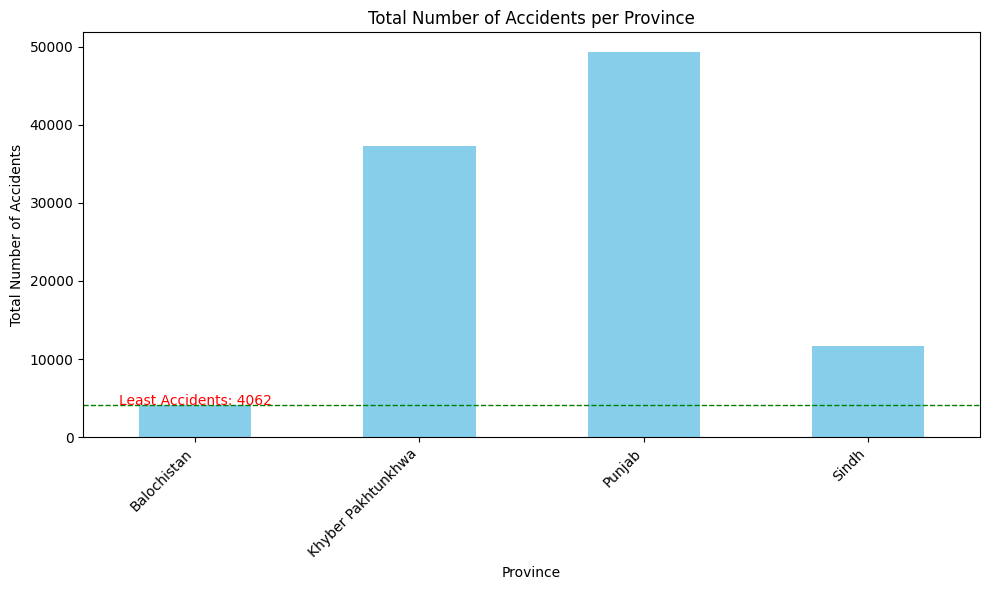

In [8]:
province_with_least_accidents = province_accidents.idxmin() #both pakistan and islamabad are ignored in the rest of the analysis
print(f"The province with the least accidents is {province_with_least_accidents} with -> {province_accidents.min()} accidents.")
print("\n")
plt.figure(figsize=(10, 6))
province_accidents.plot(kind='bar', color='skyblue')
plt.title('Total Number of Accidents per Province')
plt.xlabel('Province')
plt.ylabel('Total Number of Accidents')
plt.xticks(rotation=45, ha='right')

# puts a line at the start of each paramter passed to it, in our case its reprensing the least accident
plt.axhline(y=province_accidents.min(), color='green', linestyle='--', linewidth=1)
plt.text(province_accidents.index.tolist().index(province_with_least_accidents),
         province_accidents.min() + 10,
         f'Least Accidents: {province_accidents.min()}',
         ha='center', color='red')

plt.tight_layout()
plt.show()


**3.   In which province most people were killed?**

Provinces and Total killed:  Province
Balochistan            2604
Khyber Pakhtunkhwa    12104
Punjab                29978
Sindh                  8995
Name: Killed, dtype: int64


The province with the most killed is Punjab with 29978 killed and is show in the pie chart with a seperataion from other pieces




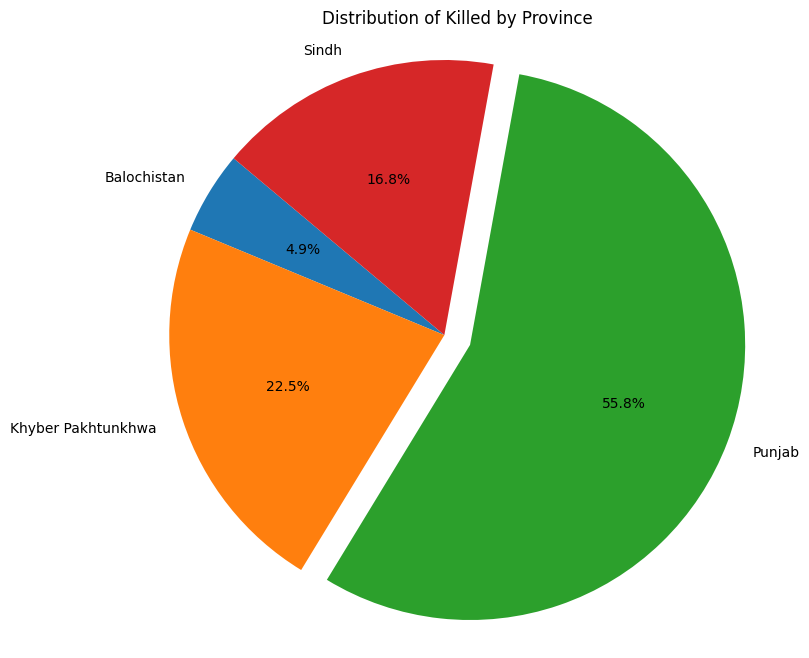

In [9]:
province_killed = filtered_data.groupby('Province')['Killed'].sum()
print("Provinces and Total killed: ", province_killed)

province_with_most_killed = province_killed.idxmax()
print("\n")
print(f"The province with the most killed is {province_with_most_killed} with {province_killed.max()} killed and is show in the pie chart with a seperataion from other pieces")
print("\n")
# retruns the number and name of the province mere most casualties have happened according to your dataset
plt.figure(figsize=(8, 8))

explode = [0.1 if province == province_with_most_killed else 0 for province in province_killed.index]

plt.pie(province_killed, labels=province_killed.index, autopct='%1.1f%%', startangle=140, explode=explode)
plt.title('Distribution of Killed by Province')
plt.axis('equal')

plt.show()

**4.  In which province least people were killed?**



The province with the least killed is Balochistan with 2604 killed and is show in the pie chart with a seperataion from other pieces




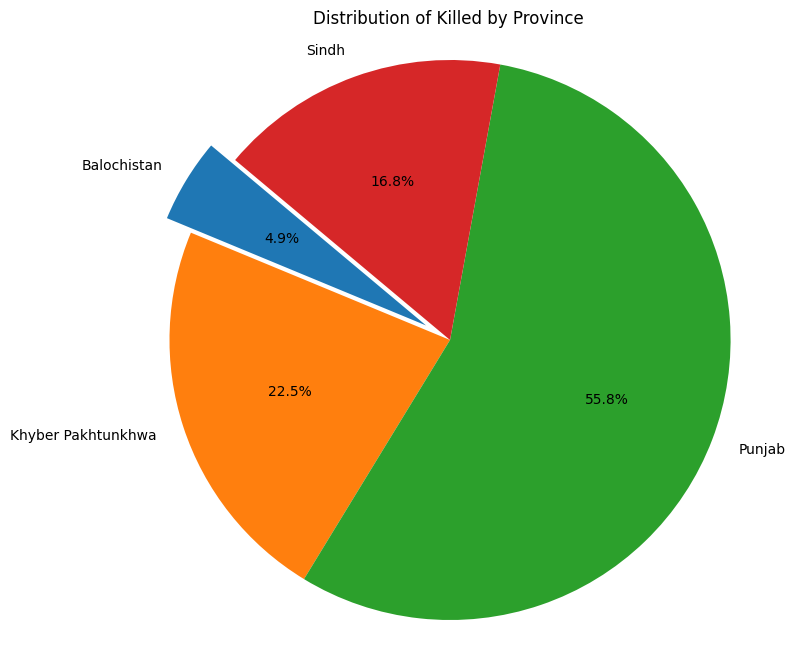

In [10]:
province_with_least_killed = province_killed.idxmin()
print("\n")
print(f"The province with the least killed is {province_with_least_killed} with {province_killed.min()} killed and is show in the pie chart with a seperataion from other pieces")
print("\n")
# retruns the number and name of the province mere least casualties have happened according to your dataset

plt.figure(figsize=(8, 8))

explode = [0.1 if province == province_with_least_killed else 0 for province in province_killed.index]

plt.pie(province_killed, labels=province_killed.index, autopct='%1.1f%%', startangle=140, explode=explode)
plt.title('Distribution of Killed by Province')
plt.axis('equal')

plt.show()

**5.   In which province most people were injured?**

Provinces and Total Injured:  Province
Balochistan            5592
Islamabad              1197
Khyber Pakhtunkhwa    50985
Punjab                57103
Sindh                  9957
Name: Injured, dtype: int64


The province with the most injured is Punjab with 57103 injured.




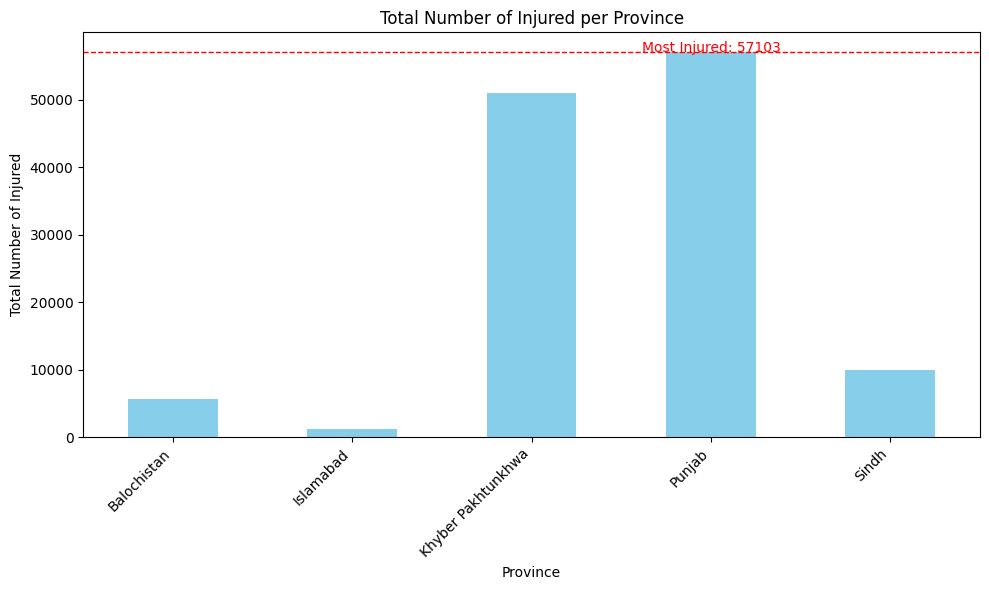

In [ ]:
import matplotlib.cm as cm

province_injured = filtered_data.groupby('Province')['Injured'].sum()
print("Provinces and Total Injured: ", province_injured)

province_with_most_injured = province_injured.idxmax()
print("\n")
print(f"The province with the most injured is {province_with_most_injured} with {province_injured.max()} injured.")
print("\n")


plt.figure(figsize=(10, 6))
province_injured.plot(kind='bar', color='skyblue')
plt.title('Total Number of Injured per Province')
plt.xlabel('Province')
plt.ylabel('Total Number of Injured')
plt.xticks(rotation=45, ha='right')

# does the same thing as the above code, just puts a linestyle at the beningin of the desired plot ,,, most injured
plt.axhline(y=province_injured.max(), color='red', linestyle='--', linewidth=1)
plt.text(province_injured.index.tolist().index(province_with_most_injured),
         province_injured.max() + 10,
         f'Most Injured: {province_injured.max()}',
         ha='center', color='red')

plt.tight_layout()
plt.show()

**6.   In which year most accident has occurred?**

Year with the most accidents: 2017-18




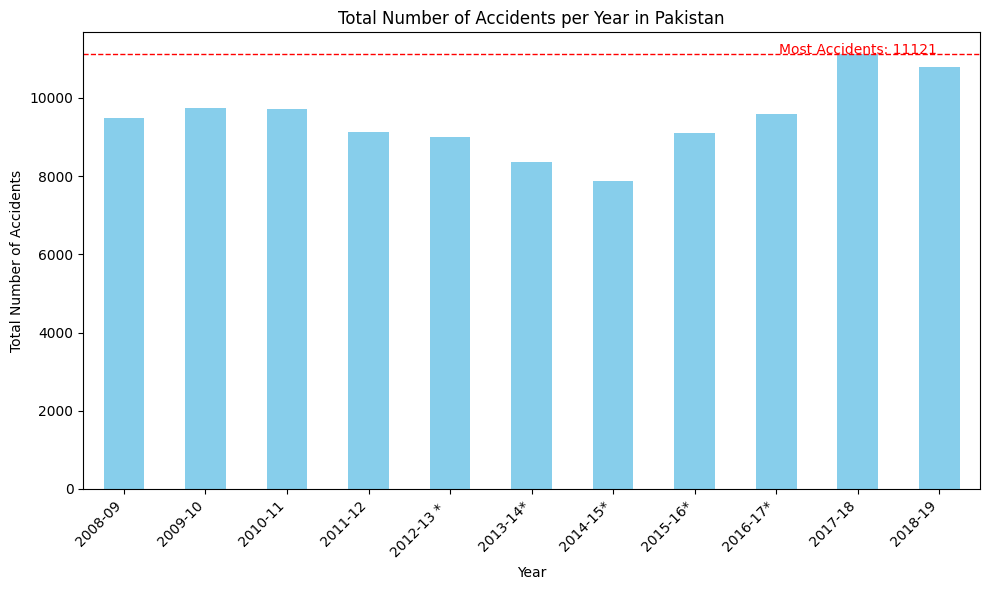

In [ ]:
filtered_data = df[df['Province'] == 'Pakistan']
year_accident = filtered_data.groupby('Year')['Total number of accidents'].sum()

year_with_most_accidents = year_accident.idxmax()
print("Year with the most accidents:", year_with_most_accidents)
print("\n")
plt.figure(figsize=(10, 6))
year_accident.plot(kind='bar', color='skyblue')
plt.title('Total Number of Accidents per Year in Pakistan')
plt.xlabel('Year')
plt.ylabel('Total Number of Accidents')
plt.xticks(rotation=45, ha='right')

plt.axhline(y=year_accident.max(), color='red', linestyle='--', linewidth=1)
plt.text(year_accident.index.tolist().index(year_with_most_accidents),
         year_accident.max() + 10,
         f'Most Accidents: {year_accident.max()}',
         ha='center', color='red')

plt.tight_layout()
plt.show()


**7.   In which year least accident has occurred?**

Year with the least accidents: 2014-15*




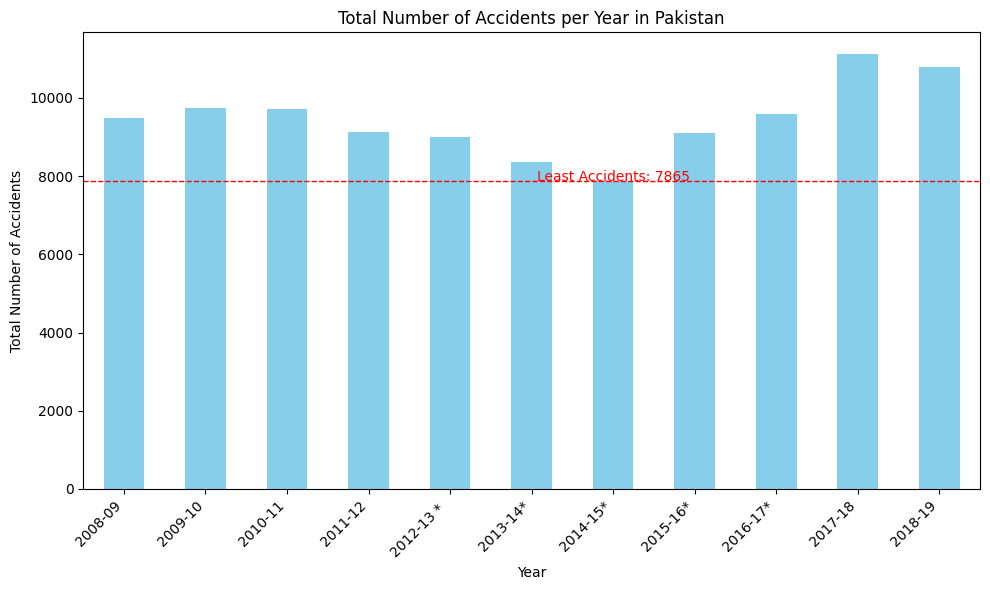

In [ ]:
filtered_data = df[df['Province'] == 'Pakistan']
year_accident = filtered_data.groupby('Year')['Total number of accidents'].sum()

year_with_least_accidents = year_accident.idxmin()
print("Year with the least accidents:", year_with_least_accidents)
print("\n")
plt.figure(figsize=(10, 6))
year_accident.plot(kind='bar', color='skyblue')
plt.title('Total Number of Accidents per Year in Pakistan')
plt.xlabel('Year')
plt.ylabel('Total Number of Accidents')
plt.xticks(rotation=45, ha='right')

plt.axhline(y=year_accident.min(), color='red', linestyle='--', linewidth=1)
plt.text(year_accident.index.tolist().index(year_with_least_accidents),
         year_accident.min() + 10,
         f'Least Accidents: {year_accident.min()}',
         ha='center', color='red')

plt.tight_layout()
plt.show()


## **Question 1 Bonus Anslysis - Pakistan Traffic Accidents Dataset**

---



**Trend Analysis of Total Number of Accidents in Pakistan**

<ipython-input-11-d7f94c9dba73>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  filtered_data['Year'] = filtered_data['Year'].str.replace(r'\D', '').astype(int)



Bonus Questions Analysis: 
This Trend Analysis of number of accidents shows a dip in the accidents in 2014 after that a gradual increase happened till 2018 



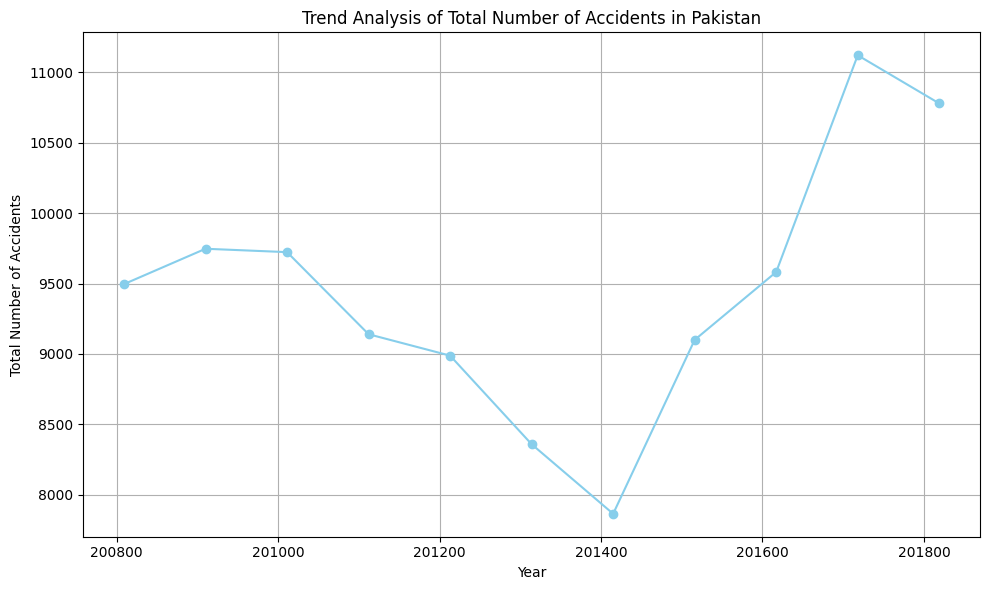

In [11]:
filtered_data = df[df['Province'] == 'Pakistan'].copy()

filtered_data['Year'] = filtered_data['Year'].str.replace(r'\D', '').astype(int) # converts the datatype of year to int as it was present in str
filtered_data = filtered_data.sort_values(by='Year')

plt.figure(figsize=(10, 6))
plt.plot(filtered_data['Year'], filtered_data['Total number of accidents'], marker='o', color='skyblue', linestyle='-')
plt.title('Trend Analysis of Total Number of Accidents in Pakistan')
plt.xlabel('Year')
plt.ylabel('Total Number of Accidents')
plt.grid(True)

print("\nBonus Questions Analysis: \nThis Trend Analysis of number of accidents shows a dip in the accidents in 2014 after that a gradual increase happened till 2018 \n")

plt.tight_layout()
plt.show()

**Fatal vs. Non-Fatal Accidents in Pakistan by Year**


Bonus Questions Analysis: 
The below bar plot shows a comparison between Fatal and Non Fatal Accidents in Pakistan by Year 



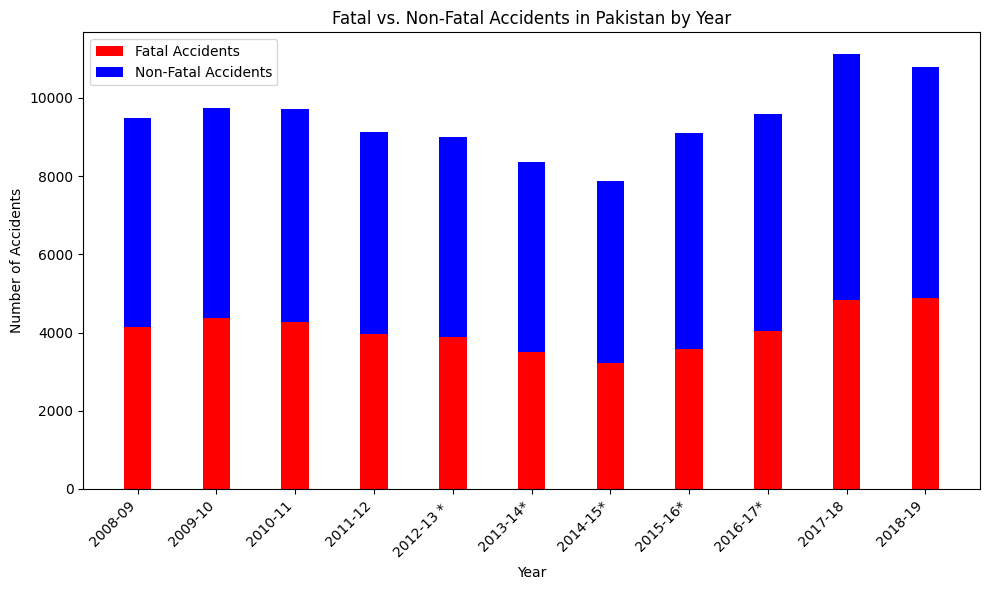

In [ ]:
filtered_data = df[df['Province'] == 'Pakistan']

plt.figure(figsize=(10, 6))
width = 0.35

fatal_bars = plt.bar(filtered_data['Year'], filtered_data['Fatal Accidents'], width, label='Fatal Accidents', color='red')
non_fatal_bars = plt.bar(filtered_data['Year'], filtered_data['Non-Fatal Accidents'], width, label='Non-Fatal Accidents', color='blue', bottom=filtered_data['Fatal Accidents'])

plt.title('Fatal vs. Non-Fatal Accidents in Pakistan by Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.legend()

print("\nBonus Questions Analysis: \nThe below bar plot shows a comparison between Fatal and Non Fatal Accidents in Pakistan by Year \n")


plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()





---




---



## **Question 2 - Petrol/Gas Prices Dataset**

**1. Show countries top 10 countries with the most expensive Petrol Prices per Liter (USD)**

<ipython-input-81-72943d59b5dc>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_countries, x='Country', y='Price Per Gallon (USD)', palette='viridis')


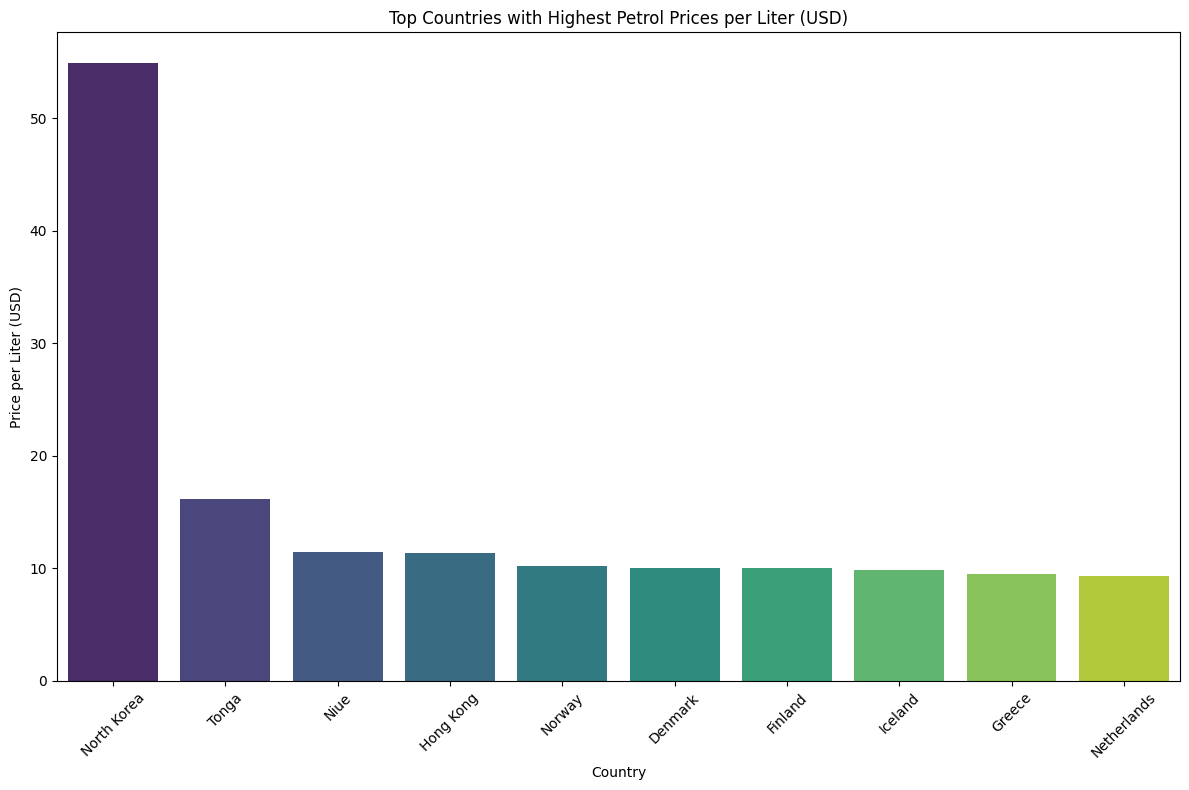

In [ ]:
top_countries = df1.nlargest(10, 'Price Per Gallon (USD)') #working on the df1 dataset as the df is related with the previous question

plt.figure(figsize=(12, 8))
sns.barplot(data=top_countries, x='Country', y='Price Per Gallon (USD)', palette='viridis')
plt.title('Top Countries with Highest Petrol Prices per Liter (USD)')
plt.xlabel('Country')
plt.ylabel('Price per Liter (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**2. Top 15 countires with the cheapest oil price in the world**

<ipython-input-23-2ef2ffd205fb>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cheapest_countries, x='Price Per Liter (USD)', y='Country', palette='viridis')


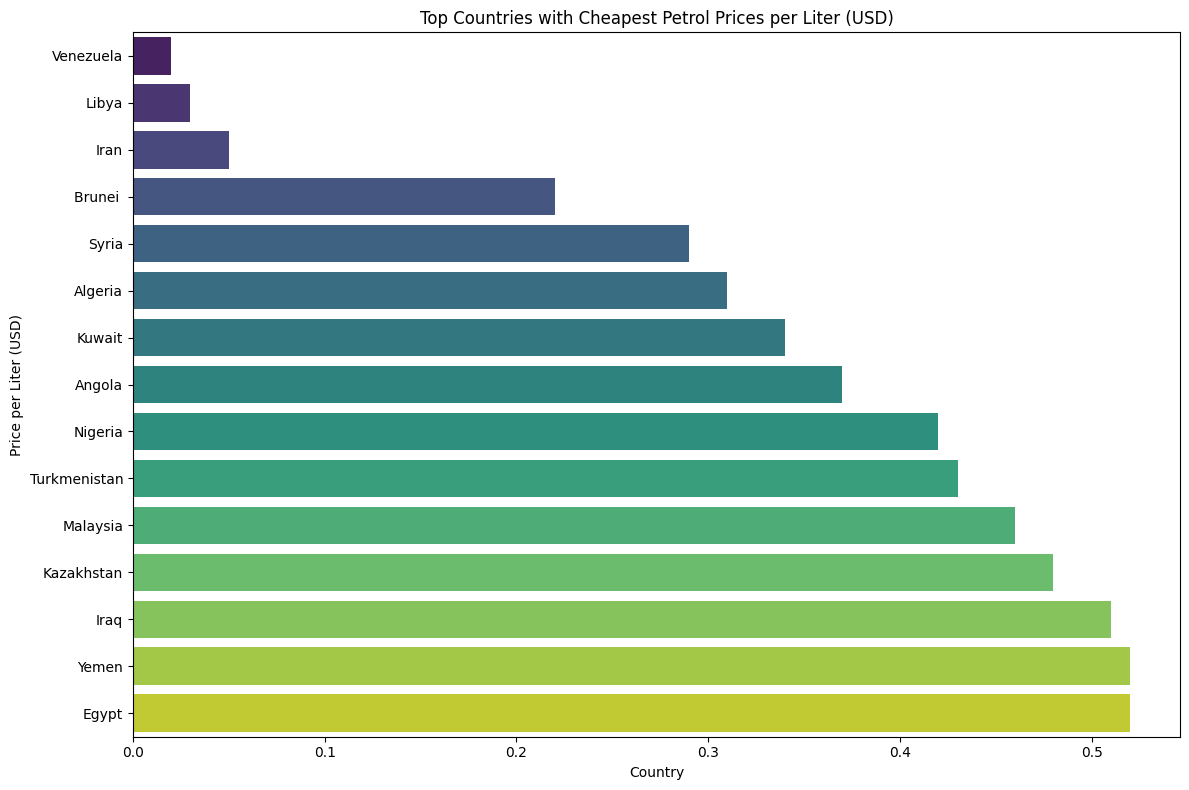

In [ ]:
cheapest_countries = df1.nsmallest(15, 'Price Per Gallon (USD)')

plt.figure(figsize=(12, 8))
sns.barplot(data=cheapest_countries, x='Price Per Liter (USD)', y='Country', palette='viridis') #love virdist pallet
plt.title('Top Countries with Cheapest Petrol Prices per Liter (USD)')
plt.xlabel('Country')
plt.ylabel('Price per Liter (USD)')
plt.tight_layout()
plt.show() #the caution msg that you are seeing while running this is from seaborn and will go away with next update

**3. What is the relationship between the yearly gallons per capita and the GDP per capita?**

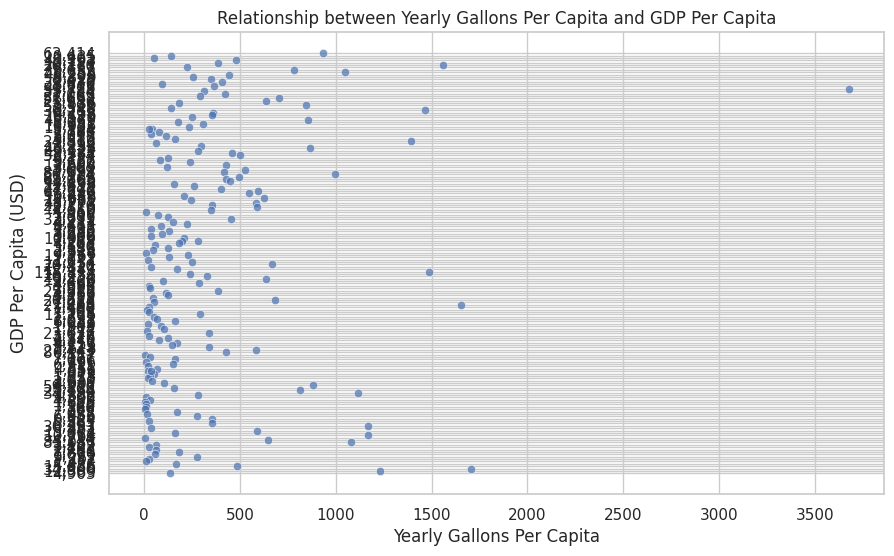

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df1, x='Yearly Gallons Per Capita', y='GDP Per Capita ( USD )', alpha=0.7)
plt.title('Relationship between Yearly Gallons Per Capita and GDP Per Capita')
plt.xlabel('Yearly Gallons Per Capita')
plt.ylabel('GDP Per Capita (USD)')
plt.grid(True)
plt.show()

**4. Distribution of Petrol Prices in PKR**

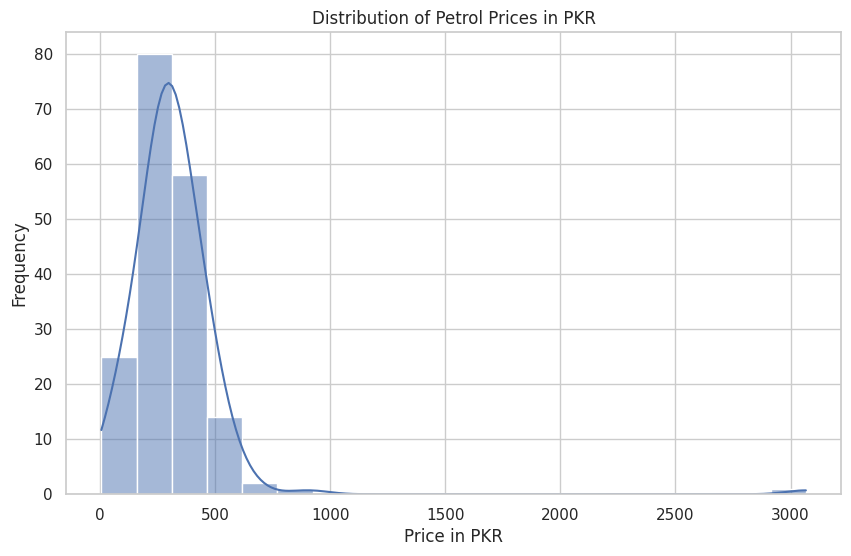

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df1['Price Per Liter (PKR)'], bins=20, kde=True)
plt.title('Distribution of Petrol Prices in PKR')
plt.xlabel('Price in PKR')
plt.ylabel('Frequency')
plt.show()

**5. Correlation Between GDP Per Capita and Price Per Liter**

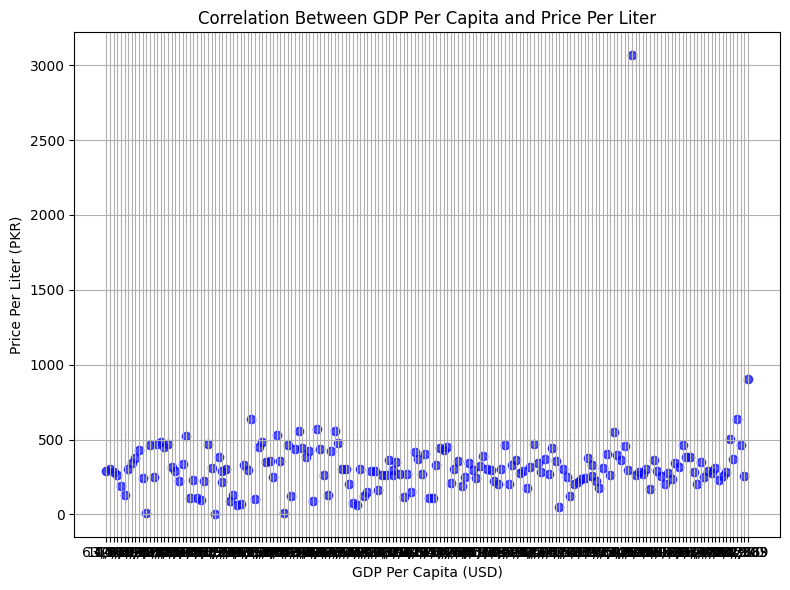

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df1['GDP Per Capita ( USD )'], df1['Price Per Liter (PKR)'], color='blue', alpha=0.7)
plt.title('Correlation Between GDP Per Capita and Price Per Liter')
plt.xlabel('GDP Per Capita (USD)')
plt.ylabel('Price Per Liter (PKR)')
plt.grid(True) #used this scatter plot with grids because without grid it looked too white :p
plt.tight_layout()
plt.show()

**6. Top 10 GDP Per Capita in USD**

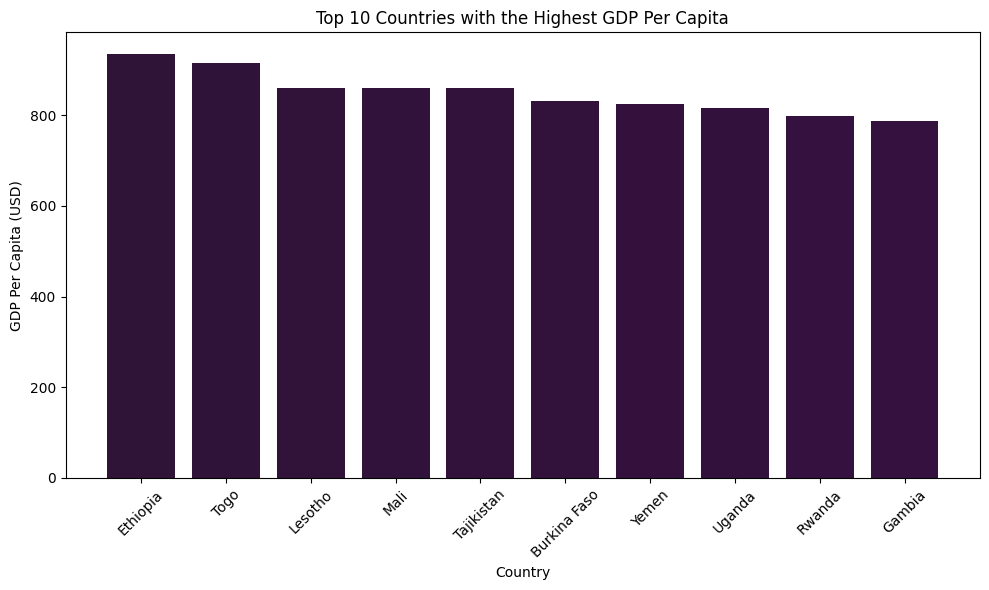

In [ ]:
df1['GDP Per Capita ( USD )'] = pd.to_numeric(df1['GDP Per Capita ( USD )'], errors='coerce')
df1.dropna(subset=['GDP Per Capita ( USD )'], inplace=True)
top_10_gdp = df1.nlargest(10, 'GDP Per Capita ( USD )') #the nlargest function selects n number of largest elements present in the specific coloumn
plt.figure(figsize=(10, 6))

plt.bar(top_10_gdp['Country'], top_10_gdp['GDP Per Capita ( USD )'], color=plt.cm.twilight_shifted(range(len(top_10_gdp)))) # btw .cm is a colormap func for matlpotlin :)
# used the twilight_shifted color pallet because it looked good
# and ever matched the analysis's these :D

plt.title('Top 10 Countries with the Highest GDP Per Capita')
plt.xlabel('Country')
plt.ylabel('GDP Per Capita (USD)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

**7. A line plot illustrating the price per liter in both USD and PKR across the top 20 countries.**

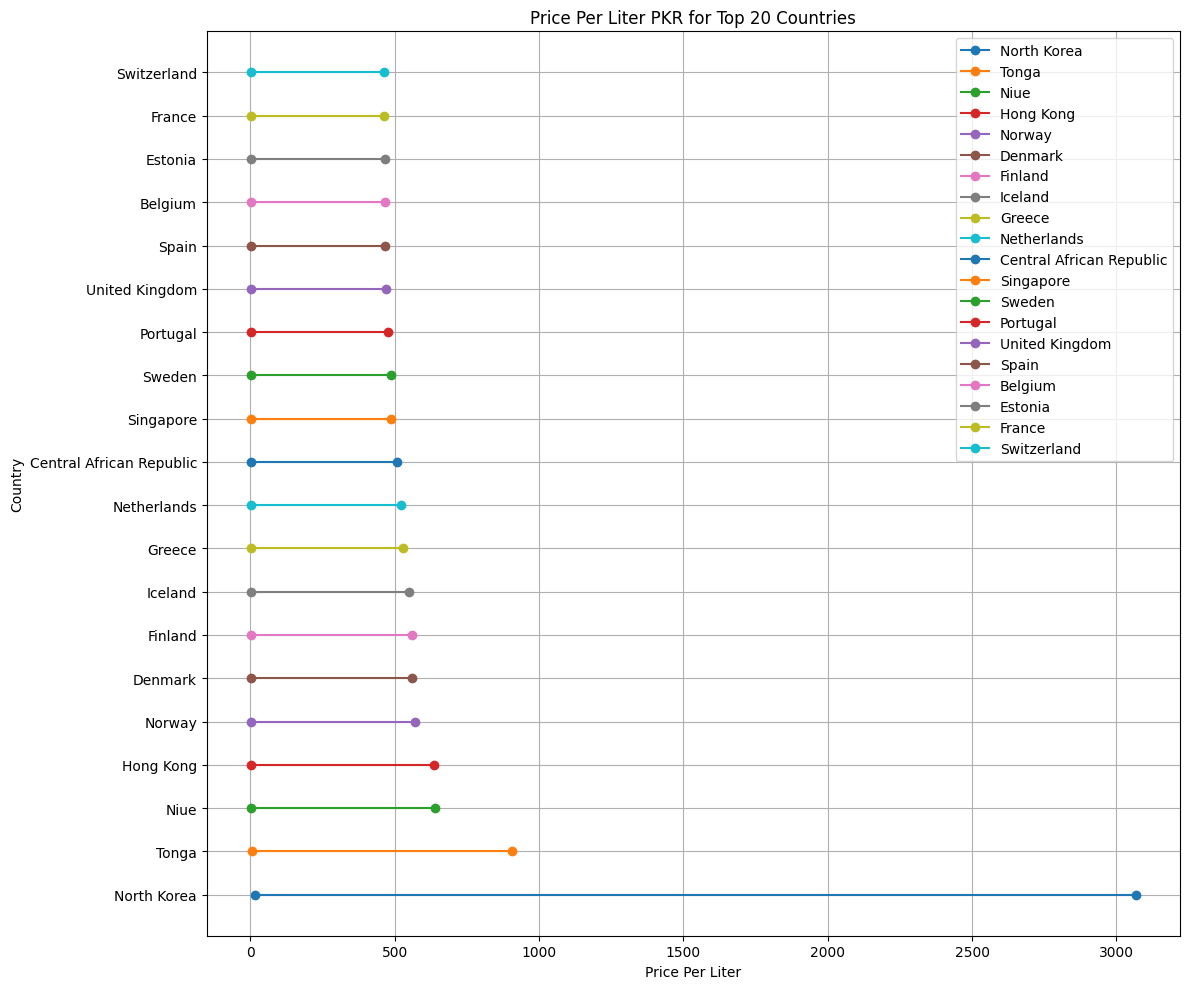

In [13]:
top_20_countries = df1.nlargest(20, 'Price Per Liter (USD)') #the nlargest function selects n number of largest elements present in the specific coloumn

plt.figure(figsize=(12, 10))
for index, row in top_20_countries.iterrows():
    plt.plot([row['Price Per Liter (USD)'], row['Price Per Liter (PKR)']], [row['Country'], row['Country']], marker='o', label=row['Country'])

plt.title('Price Per Liter PKR for Top 20 Countries')
plt.xlabel('Price Per Liter')
plt.ylabel('Country')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

##**Q2. Unique Information for Bonus Marks**

1. **Regional Disparities in Consumption:** Beyond just the total consumption difference, a closer look reveals disproportionate consumption patterns between developed and developing regions. While developed nations tend to have higher overall consumption due to factors like infrastructure and industrialization, developing regions often exhibit a faster growth rate in consumption as their economies and populations expand.

2. **GDP and Oil:** The positive correlation between GDP and oil consumption can be seen as a double-edged sword. While economic growth fuels higher energy demand, excessive reliance on oil can hinder long-term sustainability due to resource depletion and environmental impact. This necessitates a shift towards cleaner energy sources to decouple economic growth from fossil fuel dependence.

3. **Per Capita Consumption:** While per capita consumption reflects factors like urbanization and industrialization. Countries with a strong car culture or a heavy reliance on personal transportation will naturally have higher per capita consumption compared to those prioritizing public transport and alternative modes of travel. This can be seen in the case of United State in our Dataset.




---

